In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### 문제 
1. csv 폴더 안에 있는 drinks.csv 파일 로드 
2. 데이터프레임의 정보를 확인하고 결측치가 존재한다면 결측치의 개수 확인 
3. 컬럼의 이름을 변경 -> [국가, 맥주소비량, 증류주소비량, 와인소비량, 소비알콜량, 대륙]
4. 대륙 컬럼에 결측치 존재 -> 결측치 'OT' 대체
5. 새로운 파생변수(총술소비량) -> 맥주소비량 + 증류주소비량 + 와인소비량
6. 새로운 파생변수(도수) -> (소비알콜량 / 총 술소비량) * 100
7. 도수 컬럼의 전체 평균을 구하고 대륙별 도수 평균이 전체 평균보다 높은 대륙을 출력

In [ ]:
drinks = pd.read_csv("../../csv/drinks.csv")

In [ ]:
drinks.info()

In [ ]:
drinks.isna().sum()

In [ ]:
drinks.columns = ['국가', '맥주소비량', '증류주소비량', '와인소비량', 
                  '소비알콜량', '대륙']

In [ ]:
drinks.head(1)

In [ ]:
# 대륙 컬럼의 결측치를 OT 대체
drinks['대륙'].fillna('OT', inplace=True)
# drinks['대륙'] = drinks['대륙'].fillna('OT')
# Series 전체의 데이터에서 fillna() 함수를 호출하면 
# inplace = True를 이용해서 원본의 데이터 수정이 가능

In [ ]:
drinks['대륙'].value_counts()

In [ ]:
drinks.isna().sum()

In [16]:
# 파생변수 생성 
# 총 술소비량 -> 맥주소비량 + 증류주소비량 + 와인소비량
drinks['총 술소비량'] = \
    drinks['맥주소비량'] + drinks['증류주소비량'] + drinks['와인소비량']

In [ ]:
# 맥주소비량부터 와인소비량까지 필터 -> 합산 함수 사용
drinks.loc[:, '맥주소비량' : '와인소비량'].sum(axis=1)

In [17]:
# 도수 파생변수 생성 
drinks['도수'] = (drinks['소비알콜량'] / drinks['총 술소비량']) * 100

In [18]:
drinks.head()

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530


In [19]:
drinks['도수'].isna().sum()

13

In [20]:
# 도수 컬럼의 데이터가 결측치인 데이터를 확인 
# 인덱스의 조건식 -> 도수 컬럼의 데이터중 결측치인
flag = drinks['도수'].isna()

drinks.loc[flag, ]

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,NaN
13,Bangladesh,0,0,0,0.0,AS,0,NaN
46,North Korea,0,0,0,0.0,AS,0,NaN
79,Iran,0,0,0,0.0,AS,0,NaN
90,Kuwait,0,0,0,0.0,AS,0,NaN
97,Libya,0,0,0,0.0,AF,0,NaN
103,Maldives,0,0,0,0.0,AS,0,NaN
106,Marshall Islands,0,0,0,0.0,OC,0,NaN
107,Mauritania,0,0,0,0.0,AF,0,NaN
111,Monaco,0,0,0,0.0,EU,0,NaN


In [22]:
# 결측치응 그대로 둔 상태에서 도수의 평균 : 결측치를 제외하고 평균
mean_data = drinks['도수'].mean()

In [24]:
# 대륙별로 그룹화 -> 도수의 평균을 그룹화 연산
group_data = drinks.groupby('대륙')['도수'].mean()

In [26]:
group_data[group_data > mean_data]

대륙
AF    5.272516
Name: 도수, dtype: float64

In [27]:
# 도수의 결측치를 0으로 대체하고 평균 도수를 생성
# 대륙별 그룹화 
drinks['도수'].fillna(0, inplace=True)

In [28]:
drinks['도수'].isna().sum()

0

In [30]:
mean_data2 = drinks['도수'].mean()

In [32]:
group_data2 = drinks.groupby('대륙')['도수'].mean()

In [33]:
group_data2[group_data2 > mean_data2]

대륙
AF    4.974072
Name: 도수, dtype: float64

In [34]:
# 대륙이 AF인 데이터를 확인 
flag = drinks['대륙'] == 'AF'

drinks.loc[flag, ]

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
2,Algeria,25,0,14,0.7,AF,39,1.794872
4,Angola,217,57,45,5.9,AF,319,1.849530
18,Benin,34,4,13,1.1,AF,51,2.156863
22,Botswana,173,35,35,5.4,AF,243,2.222222
26,Burkina Faso,25,7,7,4.3,AF,39,11.025641
27,Burundi,88,0,0,6.3,AF,88,7.159091
28,Cote d'Ivoire,37,1,7,4.0,AF,45,8.888889
29,Cabo Verde,144,56,16,4.0,AF,216,1.851852
31,Cameroon,147,1,4,5.8,AF,152,3.815789
33,Central African Republic,17,2,1,1.8,AF,20,9.000000


- 총 술소비량을 기준으로 우리나라는 몇위인가?
    1. 총 술소비량을 기준으로 내림차순 정렬
    2. 인덱스를 초기화하고 기존의 인덱스는 제거 
    3. 국가 컬럼의 데이터가 South Korea인 데이터를 확인
    4. 해당 데이터에서 index+1값이 순위
    5. 총 술소비량이 0인 데이터는 제외하고 나머지 데이터를 기준으로 막대그래프 생성
    6. South Korea의 막대를 선택해서 막대의 색상을 변경하고 주석을 추가 

In [36]:
# 총 소비량을 기준으로 내림차순 정렬 
drinks.sort_values(['총 술소비량'], ascending=False, inplace=True)

In [39]:
# 인덱스를 초기화하고 기존의 인덱스는 제거 
drinks.reset_index(drop=True, inplace = True)

In [40]:
# South Korea의 데이터를 확인 
flag = drinks['국가'] == 'South Korea'

In [44]:
# south korea의 인덱스값을 저장
korea_idx = drinks.loc[flag, ].index[0]

In [48]:
korea_value = drinks.loc[korea_idx, '총 술소비량']

In [50]:
# 총 술소비량이 0인 데이터는 제외
# 총 술소비량이 0인 아닌 데이터만 추출
flag = drinks['총 술소비량'] != 0

drinks = drinks.loc[flag, ]

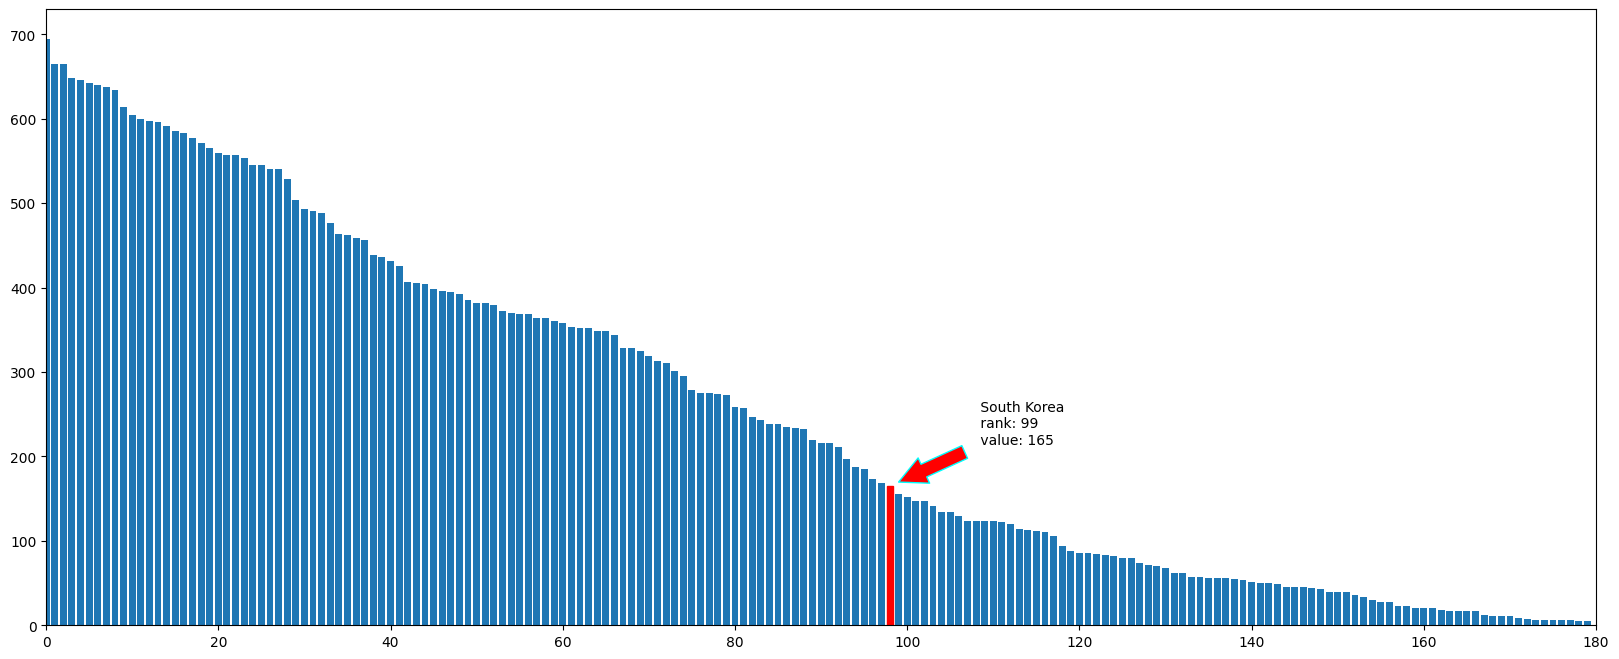

In [ ]:
# 막대 그래프를 생성 
# x축 : drinks의 index의 값
# y축 : drinks의 총 술소비량

x = drinks.index
y = drinks['총 술소비량']

# 그래프가 그려지는 공간의 크기를 조절
plt.figure(figsize=(20, 8))
# 막대 그래프 생성 
bar_list = plt.bar(x, y)

# korea_idx의 위치에 있는 막대를 선택해서 색상을 빨간색으로 변경 
bar_list[korea_idx].set_color('r')

# 주석을 추가 
plt.annotate(
    f" South Korea \n rank: {korea_idx+1} \n value: {korea_value}", 
    xy = (korea_idx, korea_value),      # 주석의 위치
    xytext = (korea_idx + 10, korea_value + 50),    # 주석의 텍스트 위치
    arrowprops= {
        'facecolor' : 'r',      # 화살표 내부의 색상 설정
        'edgecolor' : 'cyan',   # 화살표 테두리 색상 설정
        'headwidth' : 20,       # 화살표 머리 너비를 지정
        'headlength' : 20,      # 화살표 머리 길이를 지정
        'width' : 10,           # 화살표 꼬리 너비를 지정
        'shrink' : 0.1          # 화살표와 주석 문자의 거리 
    }
)
# x축의 범위를 지정 
plt.xlim(0, 180)

plt.show()